# Kalorimetrie Laborversuch

Author: Fabian Rösch

Datum: 13.12.2023

Gruppe: 01

## Forschungsfrage

Wie unterscheiden sich die spezifischen Wärmekonstanten der beiden Metalle und des Kunstoffs?


## Versuchsaufbau und Durchführung

Der Versuchsaufbau besteht aus einem Becherglas, welches mit einem Magnetrührer und drei Temperatursensoren ausgestattet ist. Ein Tauchsieder wird genutzt um die Calorimeter-Konstante zu ermitteln. Stromstärke und Spannung werden durch ein Labornetzgerät gestellt. ZUr aufwärmung der Proben wird ein Topf mit Wasser genutzt, der mit einem sous-vide garer auf 80°C gehalten wird. Die Temperatur im Topf und die Aussentemperatur werden mit weiteren Temperatursensoren gemessen.

Im ersten Versuch wird die Calorimeter-Konstante gemessen. Dafür wird eine definierte Menge an Wasser in das Becherglas gefüllt, und anschließend über den Tauchsieder mit einer definierten Leistung erwärmt.
Mit Wassermasse, Leistung und Temperaturdifferenz lässt sich anschließend die gewünschte konstante errechnen.

MIt der soeben berechneten Konstante lassen sich nun die spezifischen Wärmekapazitäten der Proben berechnen. Hierfür werden die Proben nun erst durch den sous-vide garer auf 80°C erwärmt, und anschließend im Becherglas kontrolliert abgekühlt. Die änderung der Temperatur im Becherglas wird gemessen, bis diese für 30s konstant bleibt. 



<img src="figures/Versuchsaufbau.jpeg" width="400">
<img src="figures/Netzgerät.jpeg" width="400">
<img src="figures/Proben.jpeg" width="400">


## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = 'data/Calorimeter Constant/Calorimeter Constant.h5'

# DONE #

In [3]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const,"RawData")
#print(data_dict)

# DONE #

{'temperature': array([[21.75  , 21.75  , 21.75  , 21.75  , 21.75  , 21.75  , 21.8125,
        21.8125, 21.9375, 22.    , 22.0625, 22.0625, 22.3125, 22.375 ,
        22.4375, 22.625 , 22.75  , 22.8125, 22.9375, 23.0625, 23.125 ,
        23.25  , 23.3125, 23.4375, 23.5625, 23.6875, 23.75  , 23.875 ,
        23.9375, 24.0625, 24.125 , 24.25  , 24.3125, 24.4375, 24.625 ,
        24.6875, 24.8125, 24.875 , 25.    , 25.125 , 25.1875, 25.3125,
        25.375 , 25.5625, 25.625 , 25.6875, 25.8125, 25.9375, 26.    ,
        26.125 , 26.1875, 26.25  ]]), 'timestamp': array([[  0.81,   4.91,   9.04,  13.13,  17.23,  21.33,  25.42,  29.52,
         33.61,  37.71,  41.8 ,  45.9 ,  50.  ,  54.09,  58.19,  62.32,
         66.41,  70.51,  74.61,  78.7 ,  82.8 ,  86.89,  90.99,  95.09,
         99.18, 103.31, 107.41, 111.5 , 115.6 , 119.7 , 123.79, 127.89,
        131.98, 136.08, 140.17, 144.27, 148.37, 152.46, 156.56, 160.65,
        164.75, 168.85, 172.94, 177.04, 181.13, 185.23, 189.33, 193.42,
    

In [4]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [-1]
index_environment = [0]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [5]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_environment])

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


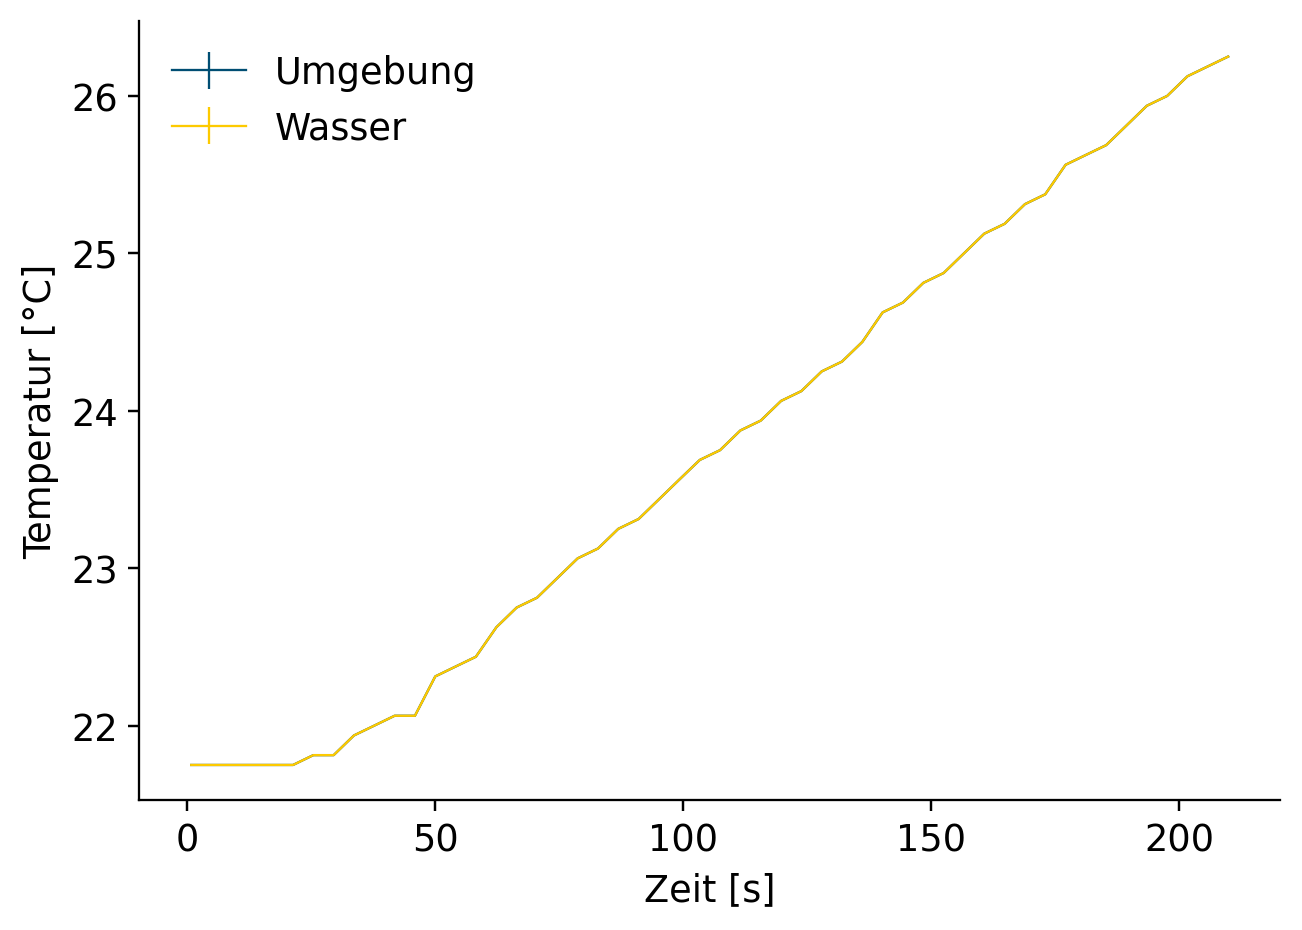

In [6]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment],[data_dict['timestamp'][index_calorimeter][0],data_dict['timestamp'][index_environment][0]] ,['Umgebung','Wasser'],'Zeit [s]','Temperatur [°C]')

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [7]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.
import json
pathjson = "data/Calorimeter Constant/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json"
with open (pathjson, 'r') as f:
    cal = json.load(f)

mass = cal["calorimeter"]["medium"]["mass"]["value"]
print(mass)

# Die Masse wurde offensichtlich beim präsenzversuch nicht richtig abgespeichert,
# deshalb wird sie hier auf die 400g gesetzt
mass = 400
print(mass)
# DONE #

0
400


In [8]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

f = h5.File(datafile_path_const, 'r')
RawData = f["RawData"]
uuids = list(RawData.keys())
Pathdata1 = "RawData/"+uuids[0]
heater_data = f[Pathdata1]

current = heater_data['Current'][()]
heat_time = heater_data['Time'][()]
voltage = heater_data['Voltage'][()]
#print(current)
# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [9]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter]) 

# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [10]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (voltage*heat_time*current)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [11]:
calorimeter_const

2016.0

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [12]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/Probe 013/Probe 013.h5"

# DONE #

In [13]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1,"RawData")

# DONE #

{'temperature': array([[20.25  , 20.3125, 20.25  , 20.25  , 20.25  , 20.3125, 20.25  ,
        20.3125, 21.6875, 23.8125, 25.3125, 26.25  , 26.875 , 27.1875,
        27.375 , 27.5625, 27.625 , 27.625 , 27.6875, 27.6875, 27.625 ,
        27.625 , 27.6875, 27.625 , 27.6875, 27.625 , 27.625 , 27.625 ,
        27.625 , 27.625 , 27.625 , 27.6875, 27.625 , 27.625 , 27.625 ,
        27.625 , 27.625 , 27.625 , 27.625 , 27.625 , 27.625 , 27.625 ]]), 'timestamp': array([[  0.8 ,   5.92,  11.04,  16.16,  21.31,  26.43,  31.55,  36.67,
         41.82,  46.94,  52.09,  57.25,  62.36,  67.48,  72.6 ,  77.72,
         82.84,  87.97,  93.08,  98.2 , 103.32, 108.44, 113.56, 118.68,
        123.8 , 128.92, 134.04, 139.16, 144.28, 149.4 , 154.52, 159.64,
        164.76, 169.88, 175.  , 180.15, 185.28, 190.4 , 195.52, 200.64,
        205.76, 210.88]]), 'name': array(['1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde'], dtype='<U36')}


In [14]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [-1]
index_bath = [0]
index_env = [0]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [15]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

# DONE #

#### (iii) Daten ploten

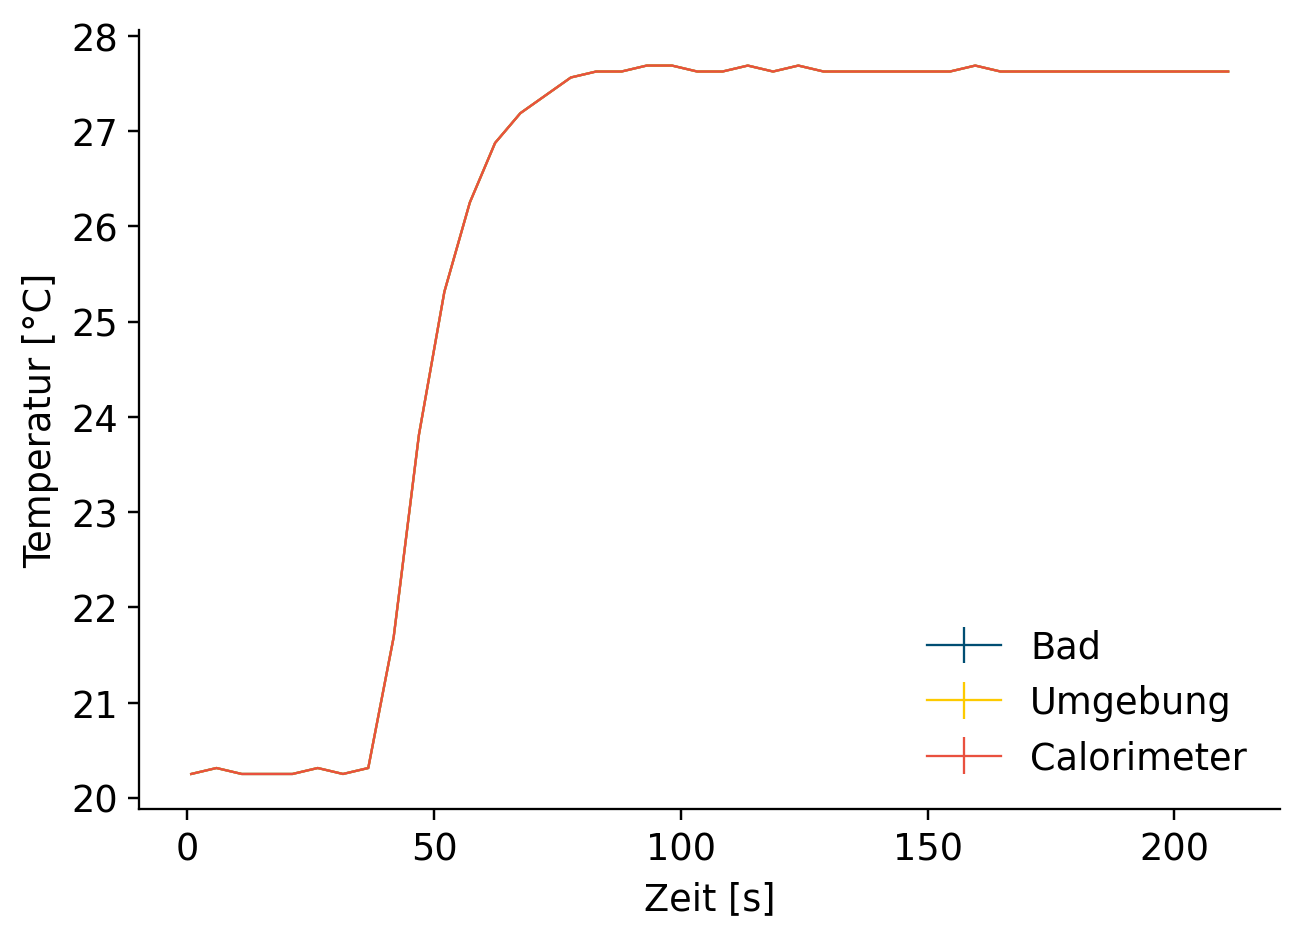

In [16]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment,mean_std_heater],[data_dict['timestamp'][index_calorimeter][0],data_dict['timestamp'][index_env][0],data_dict['timestamp'][index_bath][0]] ,['Bad','Umgebung','Calorimeter'],'Zeit [s]','Temperatur [°C]')

# DONE #

#### (iv) Metadaten auslesen

In [17]:
# TODO: Read mass of the water from the metadata of the experiment.
import json
pathjson = "data/Probe 013/probe_PDC013_1ee57b39-3992-6fa2-9f58-c86a8b7d69ba.json"
with open (pathjson, 'r') as f:
    Probe13 = json.load(f)

sample13mass = Probe13["probe"]["mass"]["value"]
print(sample13mass)

# Die Masse wurde offensichtlich beim präsenzversuch nicht richtig abgespeichert,
# deshalb wird sie hier auf 679g gesetzt
sample13mass = 679
print(sample13mass)

# DONE #

0
679


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [18]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter]) 

# DONE #

In [19]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = 80


# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [20]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/((temperature_start_sample-temperature_mix)*sample13mass)
# DONE #

#### (Vii) Ergebnis

In [21]:
sample_heat_capa

0.4221261500942246

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [43]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = 'data/Probe 16/Probe 16.h5'

# DONE #

In [44]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2,"RawData")

# DONE #

{'temperature': array([[20.1875, 20.1875, 20.1875, 20.1875, 20.1875, 20.1875, 20.1875,
        21.0625, 22.875 , 24.25  , 25.0625, 25.5   , 25.5   , 25.875 ,
        25.9375, 26.    , 26.    , 26.0625, 26.0625, 26.    , 26.0625,
        26.0625, 26.    , 26.    ]]), 'timestamp': array([[  0.81,   5.93,  11.05,  16.17,  21.29,  26.41,  31.53,  36.65,
         41.77,  46.89,  52.01,  57.13,  62.25,  67.37,  72.49,  77.61,
         82.76,  87.88,  93.  ,  98.12, 103.24, 108.36, 113.48, 118.6 ]]), 'name': array(['1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde'], dtype='<U36')}


In [45]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [-1]
index_bath = [0]
index_env = [0]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [46]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(index_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(index_env)
mean_std_heater = utility.cal_mean_and_standard_deviation(index_bath)

# DONE #

#### (iii) Daten ploten

ValueError: 'x' and 'y' must have the same size

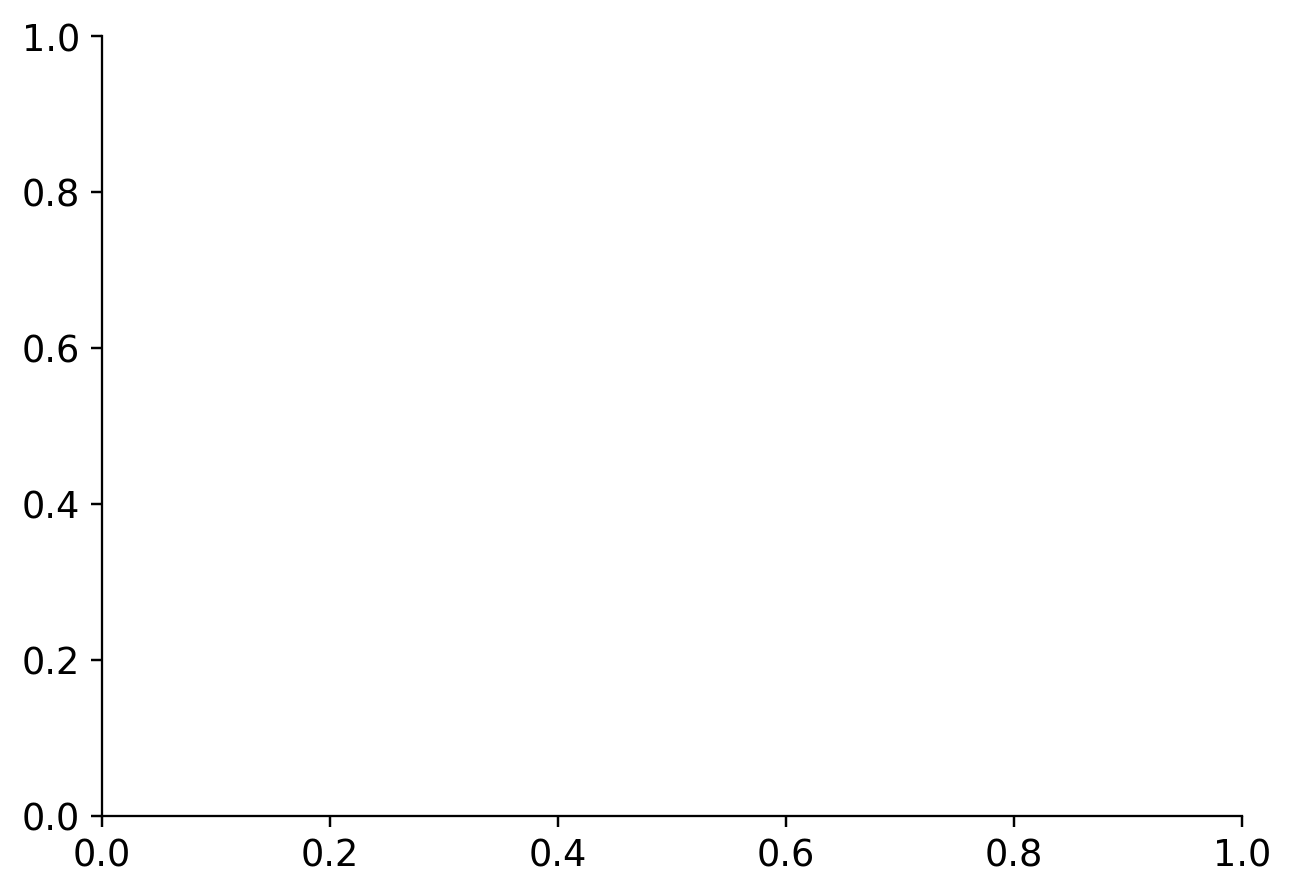

In [47]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment,mean_std_heater],[data_dict['timestamp'][index_calorimeter][0],data_dict['timestamp'][index_env][0],data_dict['timestamp'][index_bath][0]] ,['Umgebung','Calorimeter'],'Zeit [s]','Temperatur [°C]')

# DONE #

#### (iv) Metadaten auslesen

In [48]:
# TODO: Read mass of the sample from the metadata of the experiment.

import json
pathjson = "data/Probe 16/probe_PDC016_1ee57b3c-b98a-64f2-aea5-ac942cc2bc1b.json"
with open (pathjson, 'r') as f:
    Probe16 = json.load(f)

sample16mass = Probe16["probe"]["mass"]["value"]
print(sample16mass)

# Die Masse wurde offensichtlich beim präsenzversuch nicht richtig abgespeichert,
# deshalb wird sie hier auf 484g gesetzt
sample16mass = 484
print(sample16mass)

# DONE #

0
484


#### (v) Anfangs- und Endwert der Temperatur

In [49]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter])  

# DONE #

In [50]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = 80

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [51]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/((temperature_start_sample-temperature_mix)*sample16mass)
# DONE #

#### (Vii) Ergebnis

In [52]:
sample_heat_capa

0.4536931518918246

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [53]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = 'data/Probe 23/Probe 23.h5'

# DONE #

In [54]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, "RawData")

# DONE #

{'temperature': array([[20.3125, 20.25  , 20.25  , 20.25  , 20.25  , 20.3125, 20.3125,
        20.3125, 20.625 , 21.    , 21.375 , 21.625 , 21.875 , 22.125 ,
        22.125 , 22.4375, 22.5625, 22.6875, 22.8125, 22.9375, 23.    ,
        23.0625, 23.1875, 23.25  , 23.3125, 23.375 , 23.4375, 23.5   ,
        23.5625, 23.625 , 23.6875, 23.6875, 23.75  , 23.75  , 23.75  ,
        23.8125, 23.8125, 23.875 , 23.9375, 23.9375, 23.9375, 24.    ,
        23.9375, 24.0625, 24.0625, 24.0625, 24.0625, 24.0625, 24.125 ,
        24.125 , 24.125 , 24.125 , 24.1875, 24.1875, 24.1875, 24.1875,
        24.1875, 24.25  , 24.1875]]), 'timestamp': array([[  0.82,   5.93,  11.06,  16.17,  21.3 ,  26.41,  31.54,  36.65,
         41.83,  46.92,  52.04,  57.16,  62.32,  67.44,  72.56,  77.68,
         82.81,  87.92,  93.06,  98.16, 103.28, 108.4 , 113.52, 118.64,
        123.76, 128.88, 134.  , 139.12, 144.24, 149.36, 154.48, 159.6 ,
        164.72, 169.84, 174.96, 180.08, 185.2 , 190.32, 195.44, 200.56,
     

In [55]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [-1]
index_bath = [0]
index_env = [0]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [56]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(index_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(index_env)
mean_std_heater = utility.cal_mean_and_standard_deviation(index_bath)

# DONE #

#### (iii) Daten ploten

ValueError: 'x' and 'y' must have the same size

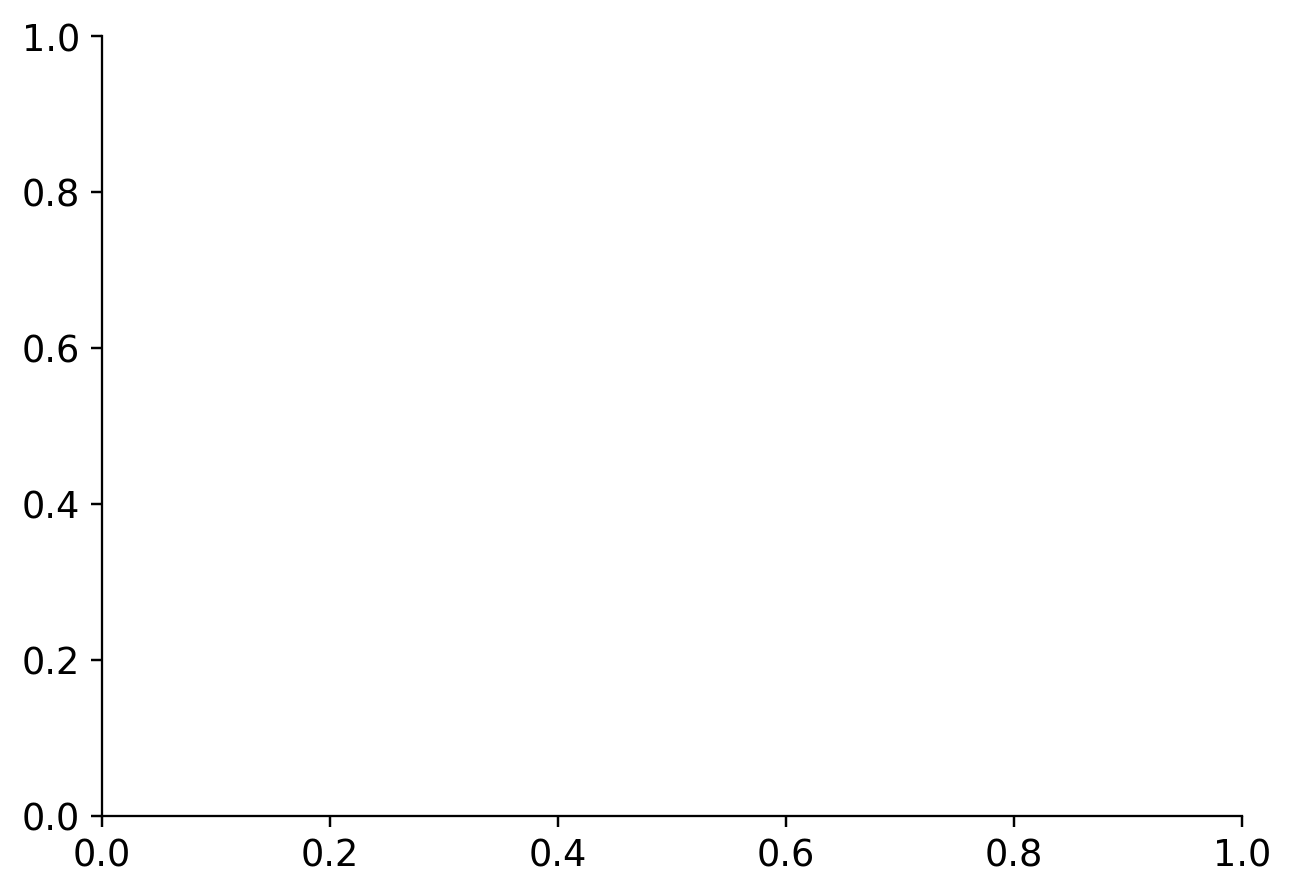

In [57]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.


utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment,mean_std_heater],[data_dict['timestamp'][index_calorimeter][0],data_dict['timestamp'][index_env][0],data_dict['timestamp'][index_bath][0]] ,['Umgebung','Calorimeter'],'Zeit [s]','Temperatur [°C]')

# DONE #

#### (iv) Metadaten auslesen

In [58]:
# TODO: Read mass of the sample from the metadata of the experiment.

import json
pathjson = "data/Probe 23/probe_PDC023_1ee7d443-5a29-6863-bb97-27e7763ee3fd.json"
with open (pathjson, 'r') as f:
    Probe23 = json.load(f)

sample23mass = Probe23["probe"]["mass"]["value"]
print(sample23mass)

# Die Masse wurde offensichtlich beim präsenzversuch nicht richtig abgespeichert,
# deshalb wird sie hier auf 500g gesetzt
sample23mass = 500
print(sample23mass)

# DONE #

0
500


#### (v) Anfangs- und Endwert der Temperatur

In [59]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter])  

# DONE #

In [60]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = 80

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [61]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/((temperature_start_sample-temperature_mix)*sample23mass)
# DONE #

#### (Vii) Ergebnis

In [62]:
sample_heat_capa

0.2892914798206278

## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

Die Ergebnisse sind Messing:0,42 Edelstahl:0,45 PVC:0,29

Aus den Ergebnissen ergibt sich, dass die beiden Metalle eine ähnliche Wärmekapazität haben, wärend der Kunstoff sich mit ~0,2 stark unterscheidet, somit weniger Wärmeenergie aufnehmen kann.
Nach kurzer Recherche haben die gemessenen Werte für Messing und Edelstahl eine Abweichung von (0,05 maximal).
Der Wert von PVC liegt dabei weit von der realtität entfernt.
Dies liegt daran, dass für die beiden Metalle realistische Massen verrechnet wurden, für PVC allerdings nur ein Platzhalter Wert genutzt wurde (Massen wurden nicht in Präsenz gemessen).
Durch das zusätzliche Wasser verändert sich Temperatur und Masse im Becherglas, wodurch das Ergebniss verfälscht wird.
Weitere Fehlerquellen sind etwa die Waage (1g ungenauigkeit), oder die Temperatursensoren, wobei durch die Nutzung von 3 Temperatursensoren diese Fehlerquelle schon minimiert wurde.



## Fazit
Ich habe viel über Versuchsdurchführung in der Praxis gelernt. Im nachhinein, beim bearbeiten der Versuchsergebnisse wurde mir klar, dass es besonders wichtig ist vor Ort genau zu arbeiten. Besonders da die Versuchzeit und Anzahl oft limitiert ist.
Die Masse nach versuchsdurchführung hätte unbedingt festgehalten werden müssen, allerdings haben sich durch den workaround dann doch nutzbare Werte ergeben.